## Medication Class Analysis Part I

In [38]:
!pip3 install wordcloud

  Using cached wordcloud-1.9.4-cp312-cp312-macosx_11_0_arm64.whl.metadata (3.4 kB)
Using cached wordcloud-1.9.4-cp312-cp312-macosx_11_0_arm64.whl (168 kB)


In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [19]:
df_pharmacy_sales = pd.read_csv("../demo_pharmacy_sales_data.csv")
df_pharmacy_sales

,Date Sold,Med_name,Med_class,Quantity Sold,Price
0,2021-05-07,Clotrimazole Topical Cream (2%),Antifungal,66,86.9
1,2021-08-09,Alprostadil Urethral Suppository (125 mcg),Prostaglandin E1 Analog,15,22.9
2,2021-06-15,Methyltestosterone Tablet (10 mg),Androgen Hormone,5,5.9
3,2021-02-19,Buspirone Tablet (5 mg),Anxiolytic,89,55.7
4,2022-09-24,Hydrocodone/Acetaminophen Tablet (5/325 mg),Opioid Analgesic/Analgesic Combination,79,0.7
...,...,...,...,...,...
999995,2020-11-29,Alprostadil Urethral Suppository (125 mcg),Prostaglandin E1 Analog,34,58.0
999996,2021-03-30,Fenoprofen Tablet (600 mg),Nonsteroidal Anti-Inflammatory Drug,12,98.3
999997,2020-04-17,Doxazosin Tablet (1 mg),Alpha-Blocker,83,10.3
999998,2021-12-08,Flumazenil Injection (0.1 mg/mL),Benzodiazepine Antagonist,1,23.9


In [20]:
df_pharmacy_sales['Med_name'].value_counts()

Med_name
Tretinoin Topical Cream (0.025%)                     15027
Ketoconazole Topical Cream (2%)                      11008
Adapalene/Benzoyl Peroxide Topical Gel (0.1/2.5%)    10097
Triamcinolone Topical Ointment (0.1%)                10083
Clobetasol Topical Cream (0.05%)                      9984
                                                     ...  
Guanfacine Tablet (2 mg)                               939
Olopatadine Nasal Spray (665 mcg/spray)                938
Methylphenidate Tablet (10 mg)                         938
Lithium Carbonate Capsule (300 mg)                     920
Clindamycin Topical Lotion (1%)                        917
Name: count, Length: 279, dtype: int64

In [21]:
df_pharmacy_sales['Med_class'].value_counts()

Med_class
Nonsteroidal Anti-Inflammatory Drug                        82146
Phosphodiesterase Type 5 Inhibitor                         56294
Alpha-Blocker                                              52208
Anticonvulsant                                             49766
Beta-Blocker                                               40673
                                                           ...  
Norepinephrine Reuptake Inhibitor                            995
Melatonin Receptor Agonist                                   983
Cardiac Glycoside                                            981
Anticholinergic/Short-Acting Beta-2 Agonist Combination      977
Mood Stabilizer                                              920
Name: count, Length: 87, dtype: int64

In [22]:
top_number = 20

In [23]:
top_classes = df_pharmacy_sales['Med_class'].value_counts().nlargest(top_number).index
top_classes

Index([' Nonsteroidal Anti-Inflammatory Drug',
       ' Phosphodiesterase Type 5 Inhibitor', ' Alpha-Blocker',
       ' Anticonvulsant', ' Beta-Blocker', ' Antifungal', ' Corticosteroid',
       ' Benzodiazepine', ' Low-Potency Corticosteroid',
       ' High-Potency Corticosteroid', ' Opioid Analgesic', ' Antibiotic',
       ' Inhaled Corticosteroid', ' 5-Alpha Reductase Inhibitor', ' Analgesic',
       ' Prostaglandin E1 Analog', ' Retinoid', ' Sympathomimetic',
       ' Vasodilator', ' Alpha-2 Agonist'],
      dtype='object', name='Med_class')

In [24]:
df_top_med_classes = df_pharmacy_sales[df_pharmacy_sales['Med_class'].isin(top_classes)]
df_top_med_classes

,Date Sold,Med_name,Med_class,Quantity Sold,Price
0,2021-05-07,Clotrimazole Topical Cream (2%),Antifungal,66,86.9
1,2021-08-09,Alprostadil Urethral Suppository (125 mcg),Prostaglandin E1 Analog,15,22.9
6,2018-10-22,Norepinephrine Injection (2 mg/mL),Sympathomimetic,96,80.6
8,2022-05-19,Rofecoxib Tablet (25 mg),Nonsteroidal Anti-Inflammatory Drug,32,21.2
9,2019-07-21,Fluticasone Inhaler (50 mcg/actuation),Inhaled Corticosteroid,71,9.6
...,...,...,...,...,...
999992,2018-10-31,Carbamazepine Tablet (200 mg),Anticonvulsant,92,73.3
999995,2020-11-29,Alprostadil Urethral Suppository (125 mcg),Prostaglandin E1 Analog,34,58.0
999996,2021-03-30,Fenoprofen Tablet (600 mg),Nonsteroidal Anti-Inflammatory Drug,12,98.3
999997,2020-04-17,Doxazosin Tablet (1 mg),Alpha-Blocker,83,10.3


In [25]:
df_top_med_classes = df_top_med_classes.groupby('Med_class')['Quantity Sold'].sum().reset_index()
df_top_med_classes

,Med_class,Quantity Sold
0,5-Alpha Reductase Inhibitor,1101549
1,Alpha-2 Agonist,802378
2,Alpha-Blocker,2625280
3,Analgesic,1061008
4,Antibiotic,1259910
5,Anticonvulsant,2514863
6,Antifungal,1819102
7,Benzodiazepine,1705063
8,Beta-Blocker,2062362
9,Corticosteroid,1776749


In [26]:
type(df_top_med_classes)

pandas.core.frame.DataFrame

In [27]:
df_top_med_classes = df_top_med_classes.sort_values(by='Quantity Sold')
df_top_med_classes

,Med_class,Quantity Sold
1,Alpha-2 Agonist,802378
19,Vasodilator,973025
18,Sympathomimetic,1005189
17,Retinoid,1019449
16,Prostaglandin E1 Analog,1060112
3,Analgesic,1061008
0,5-Alpha Reductase Inhibitor,1101549
11,Inhaled Corticosteroid,1112097
4,Antibiotic,1259910
10,High-Potency Corticosteroid,1509454


##Medication Class Analysis Part II

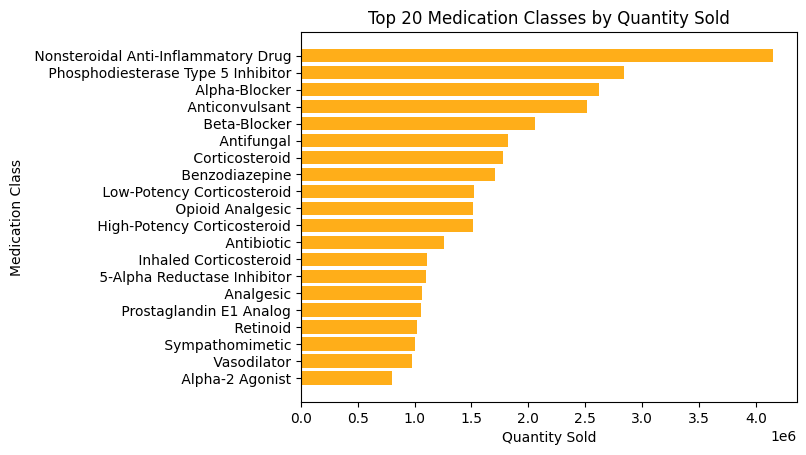

In [43]:
plt.barh(df_top_med_classes['Med_class'],df_top_med_classes['Quantity Sold'],color='orange', alpha=.9)
plt.title(f'Top {top_number} Medication Classes by Quantity Sold')
plt.xlabel("Quantity Sold")
plt.ylabel("Medication Class")
plt.show()

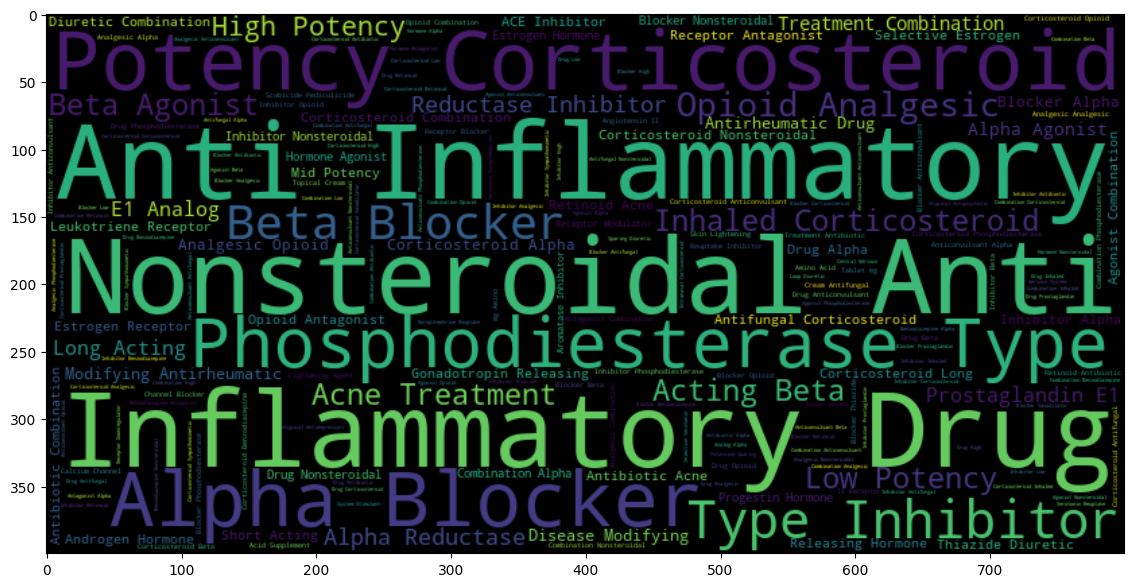

In [41]:
med_classes = df_pharmacy_sales['Med_class'].str.cat(sep='')
wordcloud = WordCloud(width=800,height=400).generate(med_classes)
plt.figure(figsize=(14,7))
plt.imshow(wordcloud,interpolation='bilinear')
plt.show()

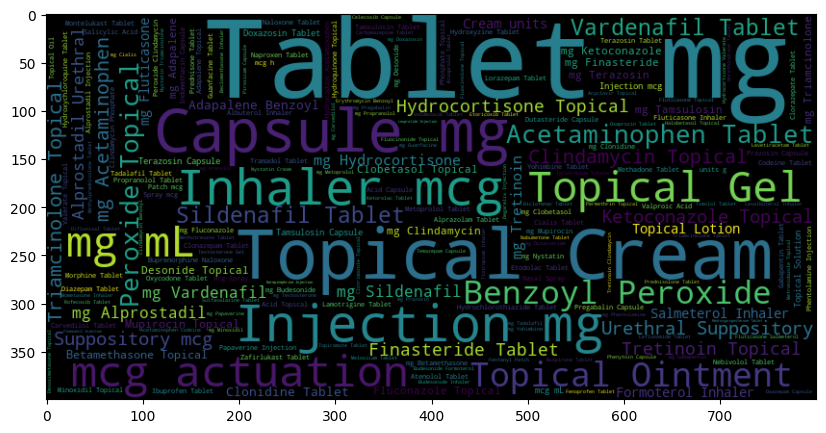

In [40]:
med_names = df_pharmacy_sales['Med_name'].str.cat(sep='')
wordcloud = WordCloud(width=800,height=400).generate(med_names)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud,interpolation='bilinear')
plt.show()